# List Comprehensions

List comprehensions are a way to create a list from another list (or collection) that might normally need to be created with a ``for`` loop. 

The general form of a list comprehension is 
~~~~
[expression for val in collection if condition]
~~~~
and is equivalent to 
~~~~
result = []
for val in collection:
    if condition:
        result.append(expression)
~~~~
(the filter condition can optionally be left out if not required.)

For example, find a list of numbers from 1 to 100 that are divisible by 7.

In [1]:
# as a loop
result = []
for num in range(1,101):
    if num % 7 == 0:
        result.append(num)
result

[7, 14, 21, 28, 35, 42, 49, 56, 63, 70, 77, 84, 91, 98]

In [2]:
# as a list comprehension 

## Dictionary Comprehensions

Dictionary can be created in a similar way.

~~~~
# dictionary comprehension
d = {key-expression : value-expression for value in collection if condition}

~~~~

As an example, let's create a dictionary where the key is a number between 1 and 20 that is divisible by 2 and the value is a list of the square and cube of the number.  


In [3]:
d = {}
for num in range(1,21):
    if num % 2 == 0:
        d[num] = [num**2, num**3]
d

{2: [4, 8],
 4: [16, 64],
 6: [36, 216],
 8: [64, 512],
 10: [100, 1000],
 12: [144, 1728],
 14: [196, 2744],
 16: [256, 4096],
 18: [324, 5832],
 20: [400, 8000]}

In [4]:
# as a dictionary comprehension

# Functions

A function is a way to organize and reuse code.  Functions in Python are created with the ``def`` statement and take the following form:

~~~~
def name_of_function(arg1, arg2, more_args):
    '''
    Docstring that describes what the function does
    '''
    
    expression
    return
~~~~

# Lambda Expressions (Anonymous Functions)

Lambda expressions are single statement functions that are so-called anonymous because they aren't given a name.  They are declared with the keyword ``lambda``.  Lambda expressions are of the form

~~~~
lambda argument(s) : expression
~~~~

There are some functions (two examples are the ``map`` and ``filter`` functions) that take as input another function.  A lambda expression is a way to define an input function without actually defining a formal function.  It is like a temporary function that will only be used once.

# NumPy

NumPy is short for Numerical Python.  It is standard to use the alias ``np`` when importing.
~~~
import numpy as np
~~~

In [6]:
import numpy as np
from numpy.random import randn

ModuleNotFoundError: No module named 'np'

The main object that we will use is the `ndarray`.  The ndarray is a generic multidimensional container for homogeneous data (all the elements must be the same data type).  We will mostly be using 1D and 2D arrays, but they can potentially have many more dimensions.  You will know the dimension of the array by the number of square brackets.

In [7]:
list_one = [1, 2, 3]
list_two = [[1, 1, 1], [2, 2, 2], [3, 3, 3]]
np.array(list_one)

array([1, 2, 3])

In [8]:
np.array(list_two)

array([[1, 1, 1],
       [2, 2, 2],
       [3, 3, 3]])

### Create array from built-in functions
~~~
np.arange(start, stop, step) #exclusive of stop
np.zeros(n) OR np.zeros([n,m])
np.ones(n) OR np.ones([n,m])
np.linspace(start, stop, n) 
np.eye(n) 
~~~

# Pandas

The panadas module is one of the most powerful tools for data analysis.  Pandas was designed to work with tabular and heterogeneous data.  It is standard to use the alias ``pd`` when importing pandas.
~~~
import pandas as pd
~~~
I usually import numpy at the same time since pandas and numpy are often used in tandem.

In [10]:
import numpy as np
import pandas as pd

The two main data structures that we will use from pandas are the *Series* and the *DataFrame*.  

## Series
A Series is a one-dimensional array-like object containing a sequence of values and an associated array of data labels, called the *index*.  

### Creating a Series
A Series can be created from a list, a numpy ndarray, or a dictionary using the function ``pd.Series``.

In [11]:
my_list = [45, 17, 16, 44, 28]  
labels = ['Utah', 'Ohio', 'Tennessee', 'Wyoming', 'Texas']

In [12]:
s = pd.Series(data = my_list, index = labels)

In [13]:
s

Utah         45
Ohio         17
Tennessee    16
Wyoming      44
Texas        28
dtype: int64

## DataFrames
DataFrames are the main data structure of pandas and were directly inspired by the R programming language.  DataFrames are a bunch of Series objects put together to share the same (row) index.  A DataFrame has both a row and a column index.  

### Creating DataFrames
DataFrames can also be created from lists, dictionaries, or numpy arrays.

In [15]:
d = {'state':['Utah','Ohio','Tennessee','Wyoming','Texas'], 'order':[45,17,16,44,28], 'min_elev':[2350,455,16,44,28], 'capital':['Salt Lake City','Columbus','Nashville','Cheyenne','Autin']}

In [16]:
df = pd.DataFrame(d)

In [17]:
df

,state,order,min_elev,capital
0,Utah,45,2350,Salt Lake City
1,Ohio,17,455,Columbus
2,Tennessee,16,16,Nashville
3,Wyoming,44,44,Cheyenne
4,Texas,28,28,Autin


## Selection and Indexing

There are various ways to get subsets of the data.  In the following ``df`` refers to a DataFrame.

#### Selecting columns
~~~
df['column_name']  # this will produce a Series
df.column_name # as long as column_name isn't a python method/attribute (also a Series)
df[['column_name']] # this will produce a DataFrame
df[['col1', 'col2', 'col3']]
~~~

#### Selecting row and columns with ``loc`` and ``iloc``
~~~
df.loc['row_name', 'col_name'] 
df.iloc['row index', 'col index']
~~~

``loc`` and ``iloc`` also support slicing.  Note: when slicing with ``loc``, the end point IS including (but not when slicing with ``iloc``.

~~~
df.loc['row_name1':'row_name2', 'col_name1':'col_name2'] #row_name2 and col_name2 WILL be included
df.loc[:, 'col_name1':'col_name2']
df.loc['r1':'r2', :]
df.loc[['r1','r2','r3'],['c1','c2]] # can also pass lists of index and column names

df.iloc[index1:index2, col1:col2] #index2 and col2 will NOT be included
~~~

#### Selecting rows based on column condition
~~~
df[df[boolean condition]]
~~~


In [18]:
df.head()

,state,order,min_elev,capital
0,Utah,45,2350,Salt Lake City
1,Ohio,17,455,Columbus
2,Tennessee,16,16,Nashville
3,Wyoming,44,44,Cheyenne
4,Texas,28,28,Autin


In [22]:
df.loc[:,['state','min_elev']]

,state,min_elev
0,Utah,2350
1,Ohio,455
2,Tennessee,16
3,Wyoming,44
4,Texas,28


In [23]:
df.loc[:,'state':'min_elev']

,state,order,min_elev
0,Utah,45,2350
1,Ohio,17,455
2,Tennessee,16,16
3,Wyoming,44,44
4,Texas,28,28


In [24]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
df = pd.read_csv(url, names=['sepal_length','sepal_width', 'petal_length', 'petal_width', 'species'])
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## Looking at your DataFrame

``df.head()``  
``df.tail()``  
``df.shape``  
``df.info()``  
``df.describe()``   
``df.columns``

## Unique values and value counts

``df.nunique()`` or ``df['column'].nunique()``  

``df.value_counts()`` or ``df['column'].value_counts()``

## Methods for computing summary and descriptive statistics
pandas objects have many reduction / summary statistics methods that extract a single value from the rows or columms of a DataFrame.  See Table 5-8 in *Python for Data Analysis* for a more complete list, but here are a few that are commonly used.

`count`: number of non-NA values   
`describe`: summary statistics for numerical columns   
`min`, `max`: min and max values  
`argmin`, `argmax`: index of min and max values ## I'm not sure if this works anymore!?   
`idxmin`, `idxmax`: index or column name of min and max values  
`sum`: sum of values  
`mean`: mean of values  
`quantile`: quantile from 0 to 1 of values  
`var`: (sample) variance of values  
`std`: (sample) standard deviation of values  

Most of these functions also take an `axis` argument which specifies whether to reduce over rows or columns: 0 for rows and 1 for columns.   
There is also an argument `skipna` which specifies whether or not to skip missing values.  The default is True.


## Groupby

There are many times that we want to look and summary statistics by a categorical column.

## Plotting with Pandas

Pandas has a built-in plotting method.  It is nice for quick and dirty plots.  For more complex and customizable plots, **matplotlib** and **seaborn** are better libraries for plotting.

<AxesSubplot:ylabel='Frequency'>

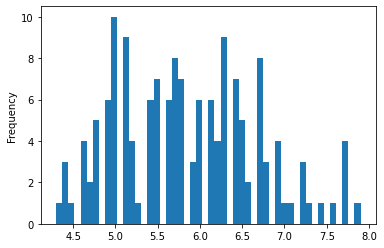

In [27]:
df['sepal_length'].plot.hist(bins=50)

In [ ]:
df['sepal_length'].plot.box()

In [ ]:
df.plot.kde()

In [ ]:
df.plot.scatter('sepal_length','sepal_width', c='petal_width')

## Joining and Merging